In [2]:
from CSIKit.reader import NEXBeamformReader
import numpy as np
from CSIKit.filters.passband import lowpass
from CSIKit.filters.statistical import running_mean
from CSIKit.util.filters import hampel

from CSIKit.tools.batch_graph import BatchGraph
from CSIKit.util import csitools

my_reader = NEXBeamformReader()
csi_data = my_reader.read_file("C:\\Users\\HOME\\Documents\\GitHub\\MoWA_CSIKit\\Empty_Ex_Home_1.pcap", scaled=True)

In [14]:
print(csi_data.filter_mac)

None


In [4]:
csi_data.frames

In [5]:
csi_data.timestamps

[1661822084.484038,
 1661822084.589437,
 1661822084.645699,
 1661822084.646851,
 1661822084.646912,
 1661822084.693539,
 1661822084.796353,
 1661822084.850262,
 1661822084.897444,
 1661822084.901512,
 1661822085.005467,
 1661822085.05294,
 1661822085.108428,
 1661822085.213467,
 1661822085.260202,
 1661822085.317355,
 1661822085.421505,
 1661822085.464711,
 1661822085.525483,
 1661822085.629491,
 1661822085.647104,
 1661822085.647443,
 1661822085.667306,
 1661822085.732407,
 1661822085.837489,
 1661822085.874226,
 1661822085.897516,
 1661822085.941544,
 1661822086.044403,
 1661822086.077023,
 1661822086.149571,
 1661822086.253486,
 1661822086.281845,
 1661822086.356512,
 1661822086.461485,
 1661822086.486597,
 1661822086.565515,
 1661822086.644478,
 1661822086.645434,
 1661822086.649941,
 1661822086.669732,
 1661822086.69146,
 1661822086.77351,
 1661822086.877488,
 1661822086.895217,
 1661822086.980545,
 1661822087.085494,
 1661822087.100976,
 1661822087.189535,
 1661822087.292517,
 16

In [6]:
csi_data.get_metadata().antenna_config

'1 Rx, 1 Tx'

In [7]:
csi_data.get_metadata().bandwidth

80

In [8]:
csi_data.backend

'Nexmon CSI'

In [9]:
csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="phase")

In [10]:
csi_matrix

array([[[[ 0.        ]],

        [[-1.77195976]],

        [[ 0.        ]],

        ...,

        [[ 2.35619449]],

        [[ 3.14159265]],

        [[-1.57079633]]],


       [[[ 0.        ]],

        [[-1.77195976]],

        [[ 0.        ]],

        ...,

        [[ 0.98279375]],

        [[-1.57079633]],

        [[-0.64350114]]],


       [[[ 0.        ]],

        [[-1.76441833]],

        [[ 0.        ]],

        ...,

        [[-1.81577499]],

        [[ 3.14159265]],

        [[-0.24497866]]],


       ...,


       [[[ 0.        ]],

        [[-1.77195976]],

        [[ 0.        ]],

        ...,

        [[ 1.03037681]],

        [[ 3.14159265]],

        [[-0.78539816]]],


       [[[ 0.        ]],

        [[ 0.        ]],

        [[ 0.        ]],

        ...,

        [[ 0.        ]],

        [[ 0.        ]],

        [[ 0.        ]]],


       [[[ 0.        ]],

        [[ 0.        ]],

        [[ 0.        ]],

        ...,

        [[ 0.        ]],

        

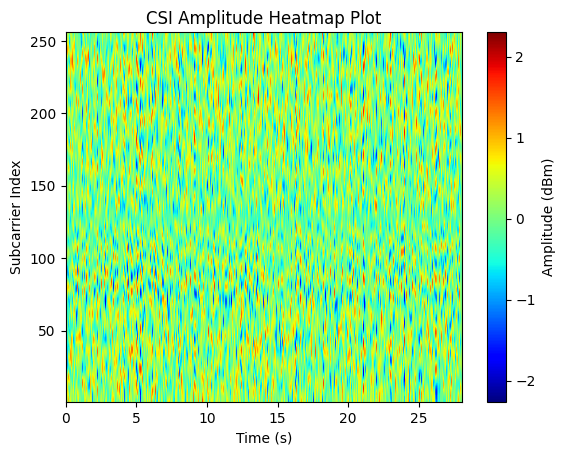

In [11]:
# CSI matrix is now returned as (no_frames, no_subcarriers, no_rx_ant, no_tx_ant).
# First we'll select the first Rx/Tx antenna pairing.
csi_matrix_first = csi_matrix[:, :, 0, 0]
# Then we'll squeeze it to remove the singleton dimensions.
csi_matrix_squeezed = np.squeeze(csi_matrix_first)

# This example assumes CSI data is sampled at ~100Hz.
# In this example, we apply (sequentially):
#  - a lowpass filter to isolate frequencies below 10Hz (order = 5)
#  - a hampel filter to reduce high frequency noise (window size = 10, significance = 3)
#  - a running mean filter for smoothing (window size = 10)

for x in range(no_frames):
  csi_matrix_squeezed[x] = lowpass(csi_matrix_squeezed[x], 10, 100, 5)
  csi_matrix_squeezed[x] = hampel(csi_matrix_squeezed[x], 10, 3)
  csi_matrix_squeezed[x] = running_mean(csi_matrix_squeezed[x], 10)

BatchGraph.plot_heatmap(csi_matrix_squeezed, csi_data.timestamps)

In [12]:
# csi_data_2 = my_reader.read_file("C:\\Users\\HOME\\Documents\\GitHub\\MoWA_CSIKit\\Standing_Ex_Home_1.pcap", scaled=True)
csi_data_2 = my_reader.read_file("C:\\Users\\HOME\\Documents\\GitHub\\MoWA_CSIKit\\Sitting_Ex_Home_1.pcap", scaled=True)
csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data_2, metric="phase")
csi_matrix

array([[[[ 0.        ]],

        [[-1.867641  ]],

        [[ 0.        ]],

        ...,

        [[-1.57079633]],

        [[ 3.14159265]],

        [[-0.27829967]]],


       [[[ 0.        ]],

        [[-1.88192155]],

        [[ 0.        ]],

        ...,

        [[ 0.46364761]],

        [[ 2.67794504]],

        [[ 0.        ]]],


       [[[ 3.14159265]],

        [[-1.87479726]],

        [[ 0.        ]],

        ...,

        [[-0.98279374]],

        [[-0.78539816]],

        [[ 0.46364761]]],


       ...,


       [[[ 0.        ]],

        [[-1.87479725]],

        [[ 0.        ]],

        ...,

        [[ 0.58800259]],

        [[-2.81984211]],

        [[ 0.32175054]]],


       [[[ 0.        ]],

        [[ 0.        ]],

        [[ 0.        ]],

        ...,

        [[ 0.        ]],

        [[ 0.        ]],

        [[ 0.        ]]],


       [[[ 0.        ]],

        [[ 0.        ]],

        [[ 0.        ]],

        ...,

        [[ 0.        ]],

        

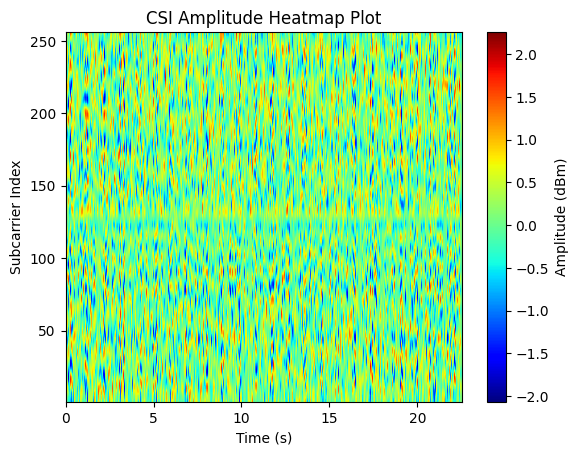

In [13]:
# CSI matrix is now returned as (no_frames, no_subcarriers, no_rx_ant, no_tx_ant).
# First we'll select the first Rx/Tx antenna pairing.
csi_matrix_first = csi_matrix[:, :, 0, 0]
# Then we'll squeeze it to remove the singleton dimensions.
csi_matrix_squeezed = np.squeeze(csi_matrix_first)

# This example assumes CSI data is sampled at ~100Hz.
# In this example, we apply (sequentially):
#  - a lowpass filter to isolate frequencies below 10Hz (order = 5)
#  - a hampel filter to reduce high frequency noise (window size = 10, significance = 3)
#  - a running mean filter for smoothing (window size = 10)

for x in range(no_frames):
  csi_matrix_squeezed[x] = lowpass(csi_matrix_squeezed[x], 10, 100, 5)
  csi_matrix_squeezed[x] = hampel(csi_matrix_squeezed[x], 10, 3)
  csi_matrix_squeezed[x] = running_mean(csi_matrix_squeezed[x], 10)

BatchGraph.plot_heatmap(csi_matrix_squeezed, csi_data_2.timestamps)